<a href="https://colab.research.google.com/github/emadens/Object-Detection/blob/main/EfficientDet/EfficientDet_FineTuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EfficientDet model implementation with custom dataset.

### Import Drive into working directory

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1.0 Turn video into image frames


In [3]:
# Take all the video frames and put it into the /content/images folder
# Start from the 3rd frame and omit the last frame since the label studio annotation are just for this range of video frames
# (To check if it's always like that with each video)
# video_path: "/content/drive/MyDrive/KTH/Tesi/CAM-HAZELDELL-MAINTST.mp4"

''' important informations'''
''' label studio frames start from 1, hence also our images will start from 1'''

import os
import cv2

def extract_frames(video_path):
  # Define the directory where you want to save the images
  dir_path = '/content/images'

  # Create the directory if it doesn't exist
  if not os.path.exists(dir_path):
      os.makedirs(dir_path)

  cap = cv2.VideoCapture(video_path)

  # Get the total number of frames in the video
  total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

  # Calculate the number of digits in the total frames
  num_digits = len(str(total_frames))

  count = 1
  while cap.isOpened():
      ret, frame = cap.read()

      if not ret:
          break

      # Include the directory path in the filename
      if count >= 3 and count < total_frames:                                   # omit the first 2 and the last frame
        filename = 'frame_{:0{width}d}.jpg'.format(count - 2, width=num_digits)
        cv2.imwrite(os.path.join(dir_path, filename), frame)

      count += 1

  print(count-3)
  cap.release()

extract_frames("/content/drive/MyDrive/KTH/Tesi/CAM-HAZELDELL-MAINTST.mp4")

1078


### Image rescaling: Upsampling/Subsampling based on the model's input image size

TO CHECK IF THE MODEL DOES IT ON ITS OWN

In [5]:
'''
Task: Upsampling/Subsampling of the images based on the image size given as input
(Comment: Since the label studio bbox are in percentage of the image's width and
height no rescaling is needed.

Input:
    images_path: Path of the images folder,
    img_size: Size of the images dictated by the model. Square image so it counts for both axis.

Output: None
'''

# def image_rescaling(img_path, img_size):

### Print Image annotations - from label studio annotations
(it seems that the x, y values start from the upper left corner in label studio)

image size:  (3840, 2160)


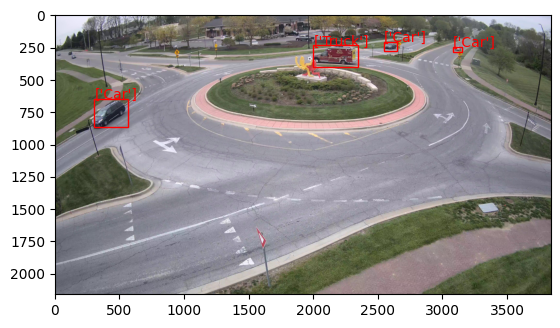

In [16]:
# ls_annotations_path = "/content/drive/MyDrive/KTH/Tesi/label_studio_ann.json"
import json
import os
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches


# works only from 0-9 otherwise change the string with the image path
# further frames could have some missing annotations since inference should be performed
def show_image_bbox(frame_num):

  # Load the json file
  with open('/content/drive/MyDrive/KTH/Tesi/label_studio_ann.json', 'r') as f:
      data = json.load(f)

  # Get the annotations
  annotations = data[0]['annotations']

  # Load the first image
  image_path = '/content/images/frame_000' + f'{frame_num}.jpg'
  image = Image.open(image_path)
  width, height = image.size

  print("image size: ", image.size)

  # Parse bounding boxes and labels from the first frame across all objects
  bboxes = []
  labels = []
  for annotation in annotations:
      for result in annotation['result']:
          for sequence_item in result['value']['sequence']:
              if sequence_item['enabled'] and sequence_item['frame'] == frame_num:
                  x = sequence_item['x'] * width / 100
                  y = sequence_item['y'] * height / 100
                  w = sequence_item['width'] * width / 100
                  h = sequence_item['height'] * height / 100
                  bboxes.append([x, y, w, h])
                  labels.append(result['value']['labels'])

  # Load the first image
  image_path ='/content/images/frame_000' + f'{frame_num}.jpg'
  image = Image.open(image_path)


  # Create figure and axes
  fig, ax = plt.subplots()

  # Display the image
  ax.imshow(image)

  # Create a Rectangle patch for each bounding box and add it to the plot
  for bbox, label in zip(bboxes, labels):
      rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=1, edgecolor='r', facecolor='none')
      ax.add_patch(rect)
      plt.text(bbox[0], bbox[1], str(label), color='r')

  # Display everything
  plt.show()

show_image_bbox(1)